In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics


## DATASET = https://www.kaggle.com/mirichoi0218/insurance

In [2]:
df=pd.read_csv("insurance.csv") #import dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().any()     #checking for null or nan values

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:
df.duplicated().sum()     #checking for duplicated values
duplicateRowsDF = df[df.duplicated()]
print(duplicateRowsDF)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [6]:
df.shape

(1338, 7)

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df=df.drop_duplicates() #removing the duplicate
df.duplicated().sum()

0

# Data Visualization

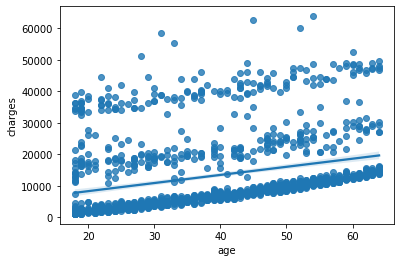

In [9]:
sns.regplot(x="age",y="charges",data=df)

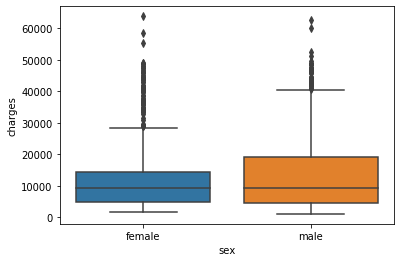

In [10]:
sns.boxplot(x='sex',y='charges',data=df)

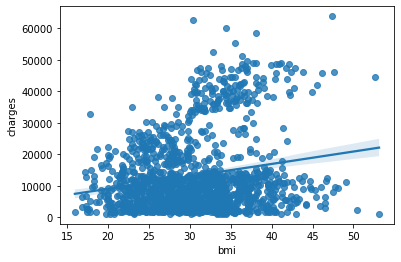

In [11]:
sns.regplot(x="bmi",y="charges",data=df)

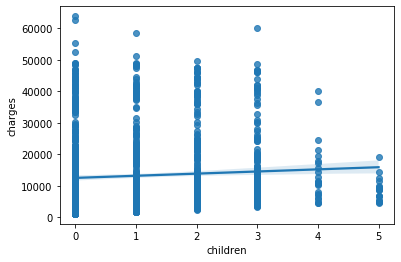

In [12]:
sns.regplot(x="children",y="charges",data=df)

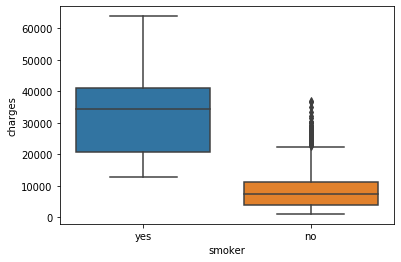

In [13]:
sns.boxplot(x='smoker',y='charges',data=df)

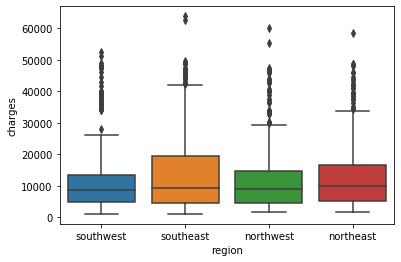

In [14]:
sns.boxplot(x='region',y='charges',data=df)

In [15]:
df # sex= 0-female, 1-male;   smoker= 0-yes,1-no;   region= 3-southwest,2-southeast,1-northwest,0-northeast;

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Splitting the data

In [16]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']= le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [18]:
reg=linear_model.LinearRegression()
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_columns=x.columns
print('x_train and x_test shape',x_train.shape,'&',x_test.shape)
print('y_train and y_test shape',y_train.shape,'&',y_test.shape)

x_train and x_test shape (935, 6) & (402, 6)
y_train and y_test shape (935,) & (402,)


In [19]:
# normalizing the dataset
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 0.76935907, -1.05611771, -0.54584829, -0.91677709, -0.53158148,
        -1.38997482],
       [ 1.34169182, -1.05611771, -0.57768002, -0.91677709, -0.53158148,
        -0.48304777],
       [ 1.5563166 ,  0.94686415,  0.91841121,  1.59696654, -0.53158148,
         1.33080632],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , -0.91677709, -0.53158148,
         0.42387927],
       [ 0.05394313, -1.05611771, -1.40698031,  0.759052  ,  1.88117914,
         0.42387927],
       [ 1.41323342,  0.94686415,  1.76278969, -0.07886255,  1.88117914,
         0.42387927]])

In [20]:
x_train=pd.DataFrame(x_train,columns=x_columns)
x_test=pd.DataFrame(x_test,columns=x_columns)
x_train

,age,sex,bmi,children,smoker,region
0,0.769359,-1.056118,-0.545848,-0.916777,-0.531581,-1.389975
1,1.341692,-1.056118,-0.577680,-0.916777,-0.531581,-0.483048
2,1.556317,0.946864,0.918411,1.596967,-0.531581,1.330806
3,-0.876098,-1.056118,0.130995,-0.916777,1.881179,1.330806
4,-0.089140,-1.056118,-0.561764,-0.078863,-0.531581,-1.389975
...,...,...,...,...,...,...
930,0.697817,-1.056118,-1.341642,-0.078863,-0.531581,-0.483048
931,-0.876098,0.946864,0.329524,1.596967,-0.531581,-1.389975
932,-1.233806,0.946864,0.528054,-0.916777,-0.531581,0.423879
933,0.053943,-1.056118,-1.406980,0.759052,1.881179,0.423879


# Training the Model

In [21]:
reg.fit(x_train,y_train)
reg.coef_


array([3599.35113876, -272.88724434, 2311.33722414,  681.9442817 ,
       9692.29903394, -381.47316582])

In [22]:
reg.intercept_

13648.78449911123

In [23]:
y_prediction=reg.predict(x_test)

# Testing the Model

In [24]:
reg.score(x_test,y_test)

0.73399749548324